About Dataset:

Percent body fat from Siri's (1956) equation
Age (years)
Weight (lbs)
Height (inches)
Neck circumference (cm)
Chest circumference (cm)
Abdomen 2 circumference (cm)
Hip circumference (cm)
Thigh circumference (cm)
Knee circumference (cm)
Ankle circumference (cm)
Biceps (extended) circumference (cm)
Forearm circumference (cm)
Wrist circumference (cm)



#Problem statement:
Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.

What is the percent body fat from Siri's 1956 equation?
Calculations of the body fat were based on the equation given by Siri (1956): Fat (%) = [(4*95/density) -4.51 x 100.

Problem :
- To know his Fat percentage he should know his Density. To know Density, He should follow these steps:
Density determined from underwater weighing is calculated by measuring an individual's weight in air and then again while submerged in water. The basic idea is that fat is less dense than water, while lean body mass is denser. Here's a simplified explanation:

Weight in Air (W_air):

This is the person's regular weight measured on land.
Weight in Water (W_water):

The person is submerged in water, and their weight is measured while underwater.
Apparent Loss of Weight (ALW):

ALW is the difference between the weight in air and the weight in water.

ALW=Wair−Wwater
 
Body Density (BD):

Body Density is calculated using the apparent loss of weight and the density of water.

BD=ALWDensity of Water
 
Is it Easy for Customer to Do these Steps? Nooo. NO.. Nooo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats
from joblib import dump

The "AC ratio" is a ratio calculated by dividing the measurement of the abdomen by the measurement of the chest. In the context of body measurements, such as in anthropometry or fitness assessments, it represents a relationship between abdominal girth and chest circumference.
Here's the formula:
AC_ratio= Chest/Abdomen
Where:
Abdomen is the measurement of the abdomen (e.g., waist circumference).
Chest is the measurement of the chest (e.g., chest circumference).


The "HTratio" is a ratio calculated by dividing the measurement of the hip by the measurement of the thigh. This ratio represents a relationship between hip circumference and thigh circumference. 

Here's the formula:

\[ HTratio = \frac{Hip}{Thigh} \]

Where:
- \( Hip \) is the measurement of the hip (e.g., hip circumference).
- \( Thigh \) is the measurement of the thigh (e.g., thigh circumference).

Similar to the AC ratio, the HTratio can provide insights into body composition and shape. For instance, a higher HTratio may indicate a larger hip circumference relative to thigh circumference. However, as with any body measurement ratio, interpretation may vary depending on the context and population being studied.


Bmi - Body Mass Index.
ACratio - Abdomen Chest Ratio
HTratio - Hip Thigh Ratio

In [4]:
df = pd.read_csv(r'C:\Users\janar\OneDrive\Documents\SRM_Project_Final_year\bodyfat.csv')
df.head(5)
#convert Weight and Height from lbs/in to Kg and meters (mandatory if we want to calculate BMI and in order to uniform with unit measures of the other features)
df['Weight']= df['Weight']* 0.45359237
df['BMI'] = df['Weight']/(df['Height']**2)
df['ACratio'] = df['Abdomen']/df['Chest']
df['HTratio'] = df['Hip']/df['Thigh']
df.head()

,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI,ACratio,HTratio
0,12.3,23,69.966623,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0.015243,0.915145,1.601695
1,6.1,22,78.584878,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0.015054,0.886752,1.681431
2,25.3,22,69.853225,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0.015915,0.917537,1.664430
3,10.4,26,83.801190,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,0.016054,0.848723,1.683860
4,28.7,24,83.574394,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,0.016463,1.027749,1.612342


In [2]:
df = pd.read_csv(r'C:\Users\janar\OneDrive\Documents\SRM_Project_Final_year\bodyfat.csv')
df.head(5)
#convert Weight and Height from lbs/in to Kg and meters (mandatory if we want to calculate BMI and in order to uniform with unit measures of the other features)
df['Weight']= df['Weight']* 0.45359237
df['BMI'] = df['Weight']/(df['Height']**2)
df['ACratio'] = df['Abdomen']/df['Chest']
df['HTratio'] = df['Hip']/df['Thigh']
df.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)


In [3]:
df.head()

,BodyFat,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,BMI,ACratio,HTratio
0,12.3,23,36.2,37.3,21.9,32.0,27.4,17.1,0.015243,0.915145,1.601695
1,6.1,22,38.5,37.3,23.4,30.5,28.9,18.2,0.015054,0.886752,1.681431
2,25.3,22,34.0,38.9,24.0,28.8,25.2,16.6,0.015915,0.917537,1.664430
3,10.4,26,37.4,37.3,22.8,32.4,29.4,18.2,0.016054,0.848723,1.683860
4,28.7,24,34.4,42.2,24.0,32.2,27.7,17.7,0.016463,1.027749,1.612342


In [28]:
df.columns

Index(['BodyFat', 'Age', 'Neck', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist',
       'BMI', 'ACratio', 'HTratio'],
      dtype='object')

In [29]:
print("Rows :",df.shape[0])
print('Columns :',df.shape[1])

Rows : 252
Columns : 11


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BodyFat,252.0,19.150794,8.368740,0.000000,12.475000,19.200000,25.300000,47.500000
Age,252.0,44.884921,12.602040,22.000000,35.750000,43.000000,54.000000,81.000000
Neck,252.0,37.992063,2.430913,31.100000,36.400000,38.000000,39.425000,51.200000
Knee,252.0,38.590476,2.411805,33.000000,36.975000,38.500000,39.925000,49.100000
Ankle,252.0,23.102381,1.694893,19.100000,22.000000,22.800000,24.000000,33.900000
Biceps,252.0,32.273413,3.021274,24.800000,30.200000,32.050000,34.325000,45.000000
Forearm,252.0,28.663889,2.020691,21.000000,27.300000,28.700000,30.000000,34.900000
Wrist,252.0,18.229762,0.933585,15.800000,17.600000,18.300000,18.800000,21.400000
BMI,252.0,0.016737,0.006167,0.011624,0.014862,0.016190,0.017635,0.106850
ACratio,252.0,0.916330,0.046870,0.790374,0.885805,0.917059,0.944973,1.087372


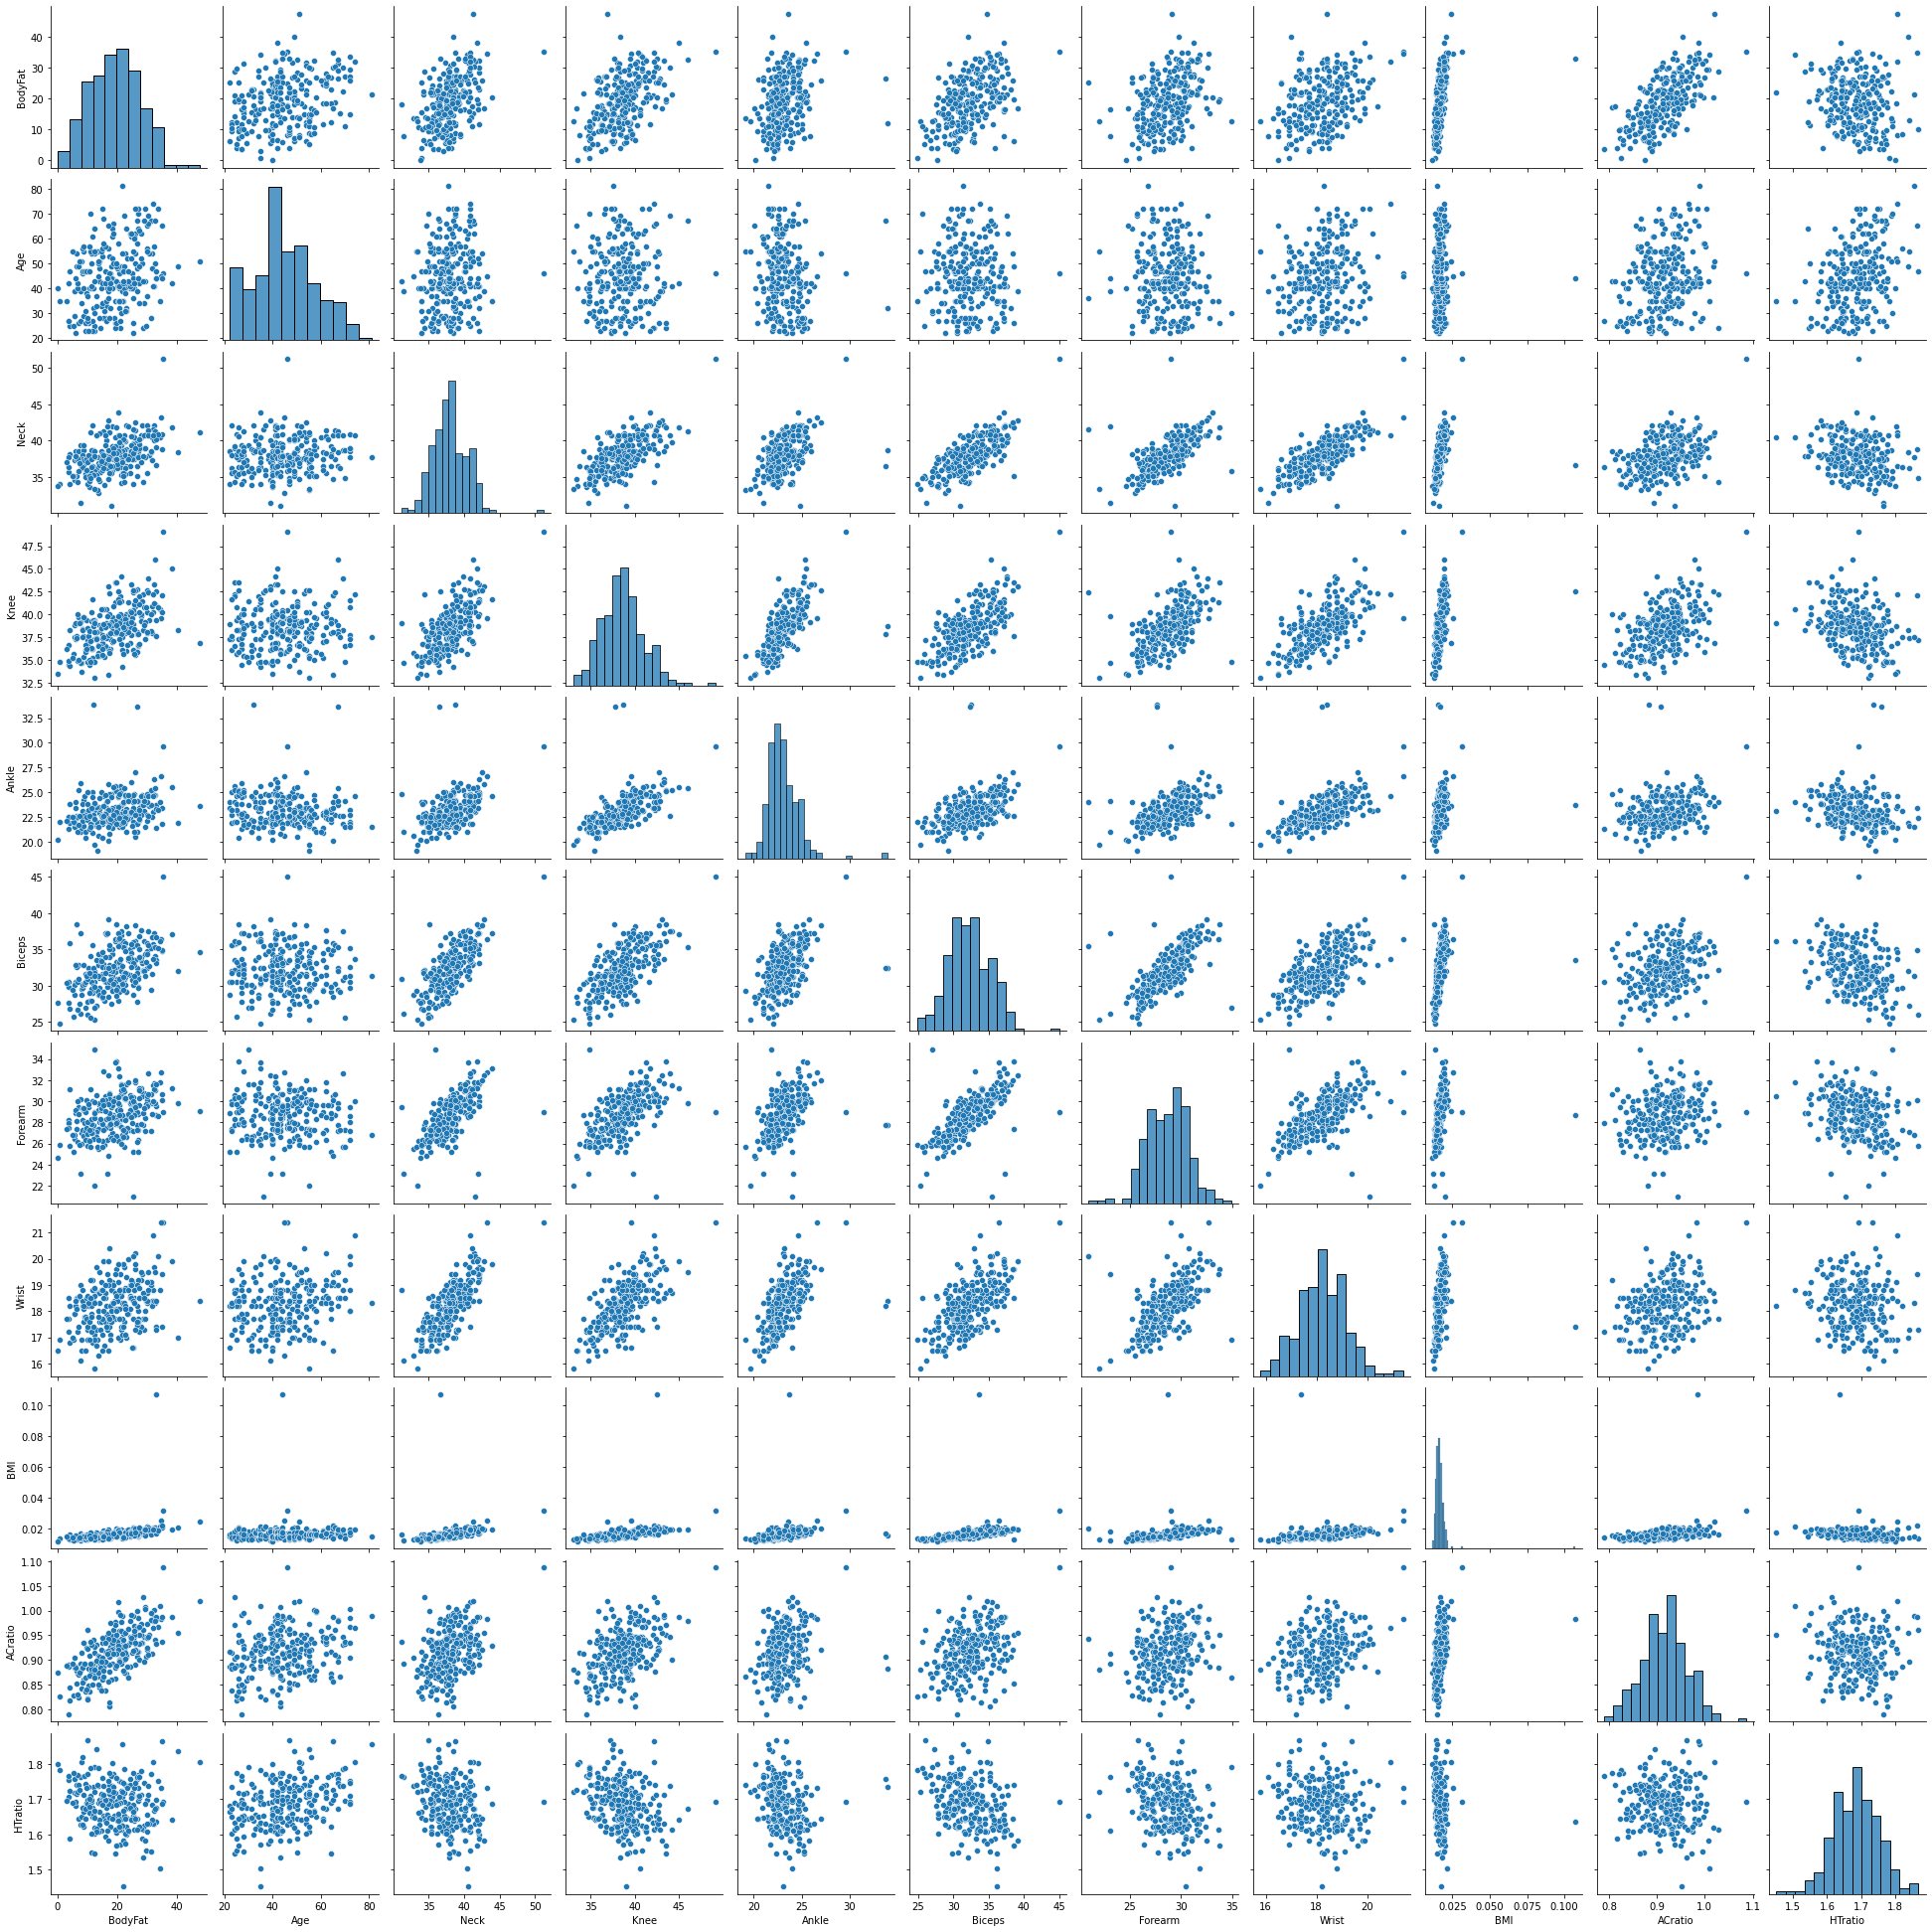

In [31]:
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.show()

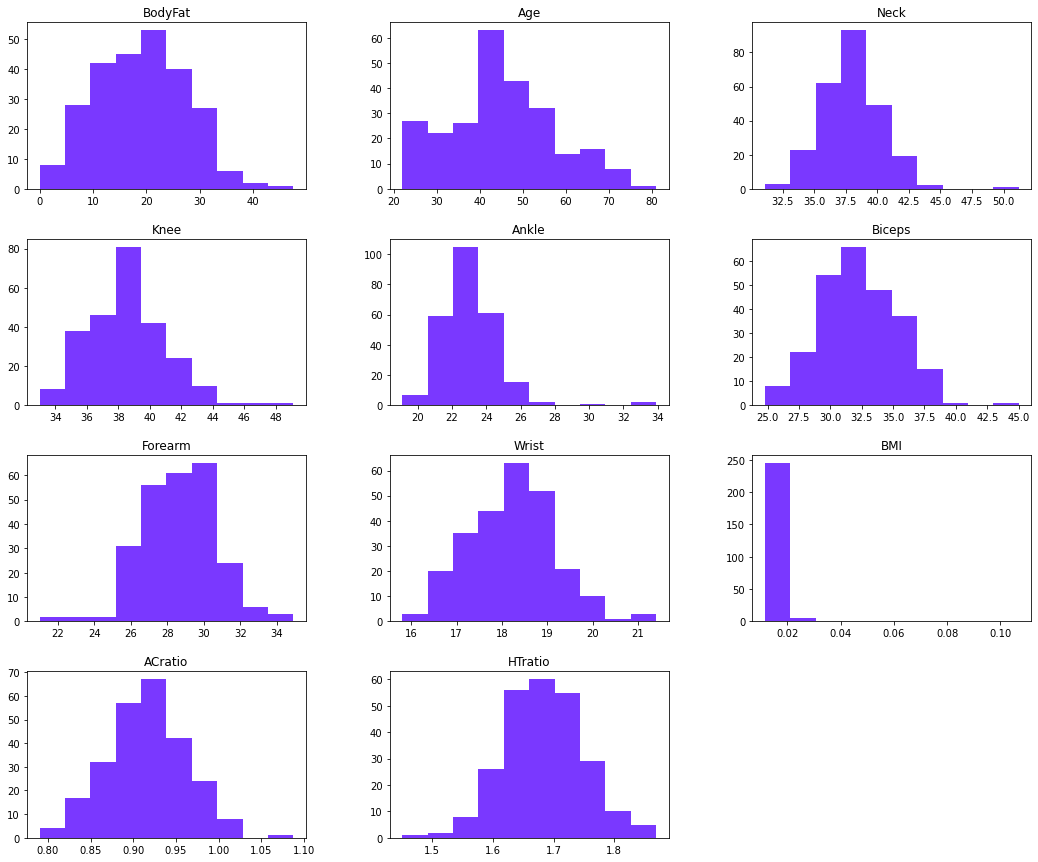

In [32]:
df.hist(figsize=(18,15),grid=False,color='#7a38ff')
plt.show()

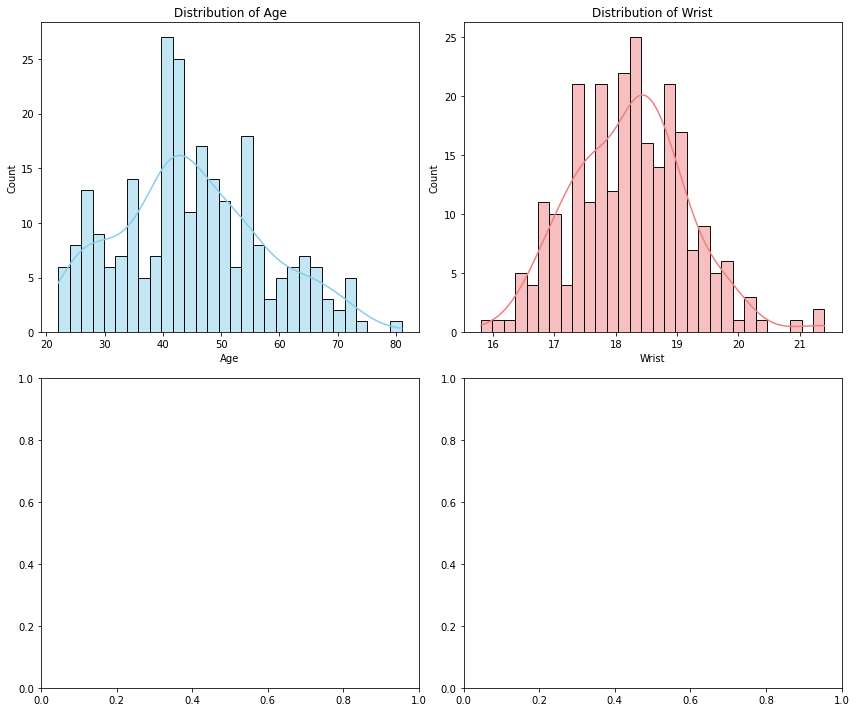

In [33]:
# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting the distribution of each variable
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

sns.histplot(df['Wrist'], kde=True, bins=30, color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Wrist')




# Adjust layout
plt.tight_layout()
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Neck     252 non-null    float64
 3   Knee     252 non-null    float64
 4   Ankle    252 non-null    float64
 5   Biceps   252 non-null    float64
 6   Forearm  252 non-null    float64
 7   Wrist    252 non-null    float64
 8   BMI      252 non-null    float64
 9   ACratio  252 non-null    float64
 10  HTratio  252 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 21.8 KB


 # Data Preparation¶

In [35]:
df.isnull().sum()/df.shape[0]*100

BodyFat    0.0
Age        0.0
Neck       0.0
Knee       0.0
Ankle      0.0
Biceps     0.0
Forearm    0.0
Wrist      0.0
BMI        0.0
ACratio    0.0
HTratio    0.0
dtype: float64

In [36]:
df.shape

(252, 11)

In [37]:
# Removing Outliers

In [38]:
z = np.abs(stats.zscore(df))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
df= df[(z<3).all(axis=1)]
df.shape

(241, 11)

# Linear Regression - OLS

In [39]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['BodyFat'])
y = df['BodyFat']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=10)
x_train_cons =  sm.add_constant(X_train)
lr_ols = sm.OLS(y_train,X_train).fit()
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                BodyFat   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              348.2
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                   5.75e-113
Time:                        19:51:58   Log-Likelihood:                         -562.76
No. Observations:                 192   AIC:                                      1146.
Df Residuals:                     182   BIC:                                      1178.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.1456      0.034      4.286      0.000       0.079       0.213
Neck          -0.4953      0.270     -1.832      0.069      -1.029       0.038
Knee           0.0185      0.284      0.065      0.948      -0.542       0.579
Ankle         -0.4762      0.425     -1.119      0.265      -1.316       0.363
Biceps        -0.0364      0.207     -0.176      0.860      -0.445       0.372
Forearm        0.2146      0.334      0.642      0.522      -0.445       0.874
Wrist         -1.9274      0.719     -2.682      0.008      -3.346      -0.509
BMI         2882.6564    306.312      9.411      0.000    2278.276    3487.037
ACratio       55.9236      8.581      6.517      0.000      38.993      72.854
HTratio      -15.8529      4.184     -3.789      0.000     -24.109      -7.597
==============================================================================
Omnibus:                        4.356   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                2.764
Skew:                          -0.082   Prob(JB):                        0.251
Kurtosis:                       2.435   Cond. No.                     8.00e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

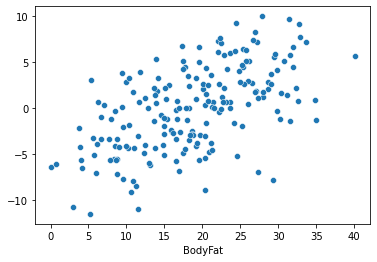

In [40]:
residuals = lr_ols.resid
sns.scatterplot(x = y_train,y=residuals)
plt.show()


# Multi collenearity

<AxesSubplot:>

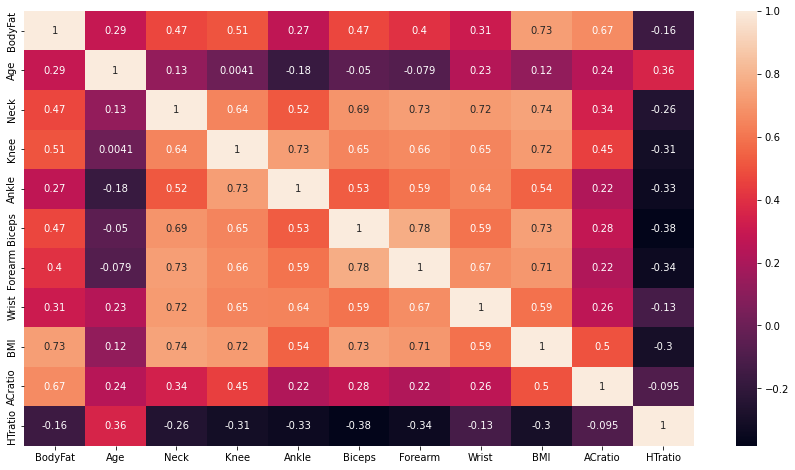

In [41]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

# Feature selection

In [42]:
# type your code here
from sklearn.feature_selection import RFE

In [43]:
lr = LinearRegression()
rfe = RFE(lr,n_features_to_select=5)
rfe.fit(X_train,y_train)
pd.DataFrame({'rank':rfe.ranking_,'features': X_test.columns}).sort_values(by=['rank'])

,rank,features
1,1,Neck
6,1,Wrist
7,1,BMI
8,1,ACratio
9,1,HTratio
5,2,Forearm
0,3,Age
3,4,Ankle
4,5,Biceps
2,6,Knee


# As per general Medical Conditions

The relationship between various anthropometric measurements and age with body fat percentage is an area of significant interest in health and fitness research. Here's how these factors correlate with body fat percentage, sorted by relevance:

Abdomen Circumference: This is one of the strongest indicators of body fat percentage due to its association with visceral fat. Visceral fat accumulation around the internal organs is a significant health risk factor.

Hip Circumference: Used to calculate the waist-to-hip ratio, it is indicative of fat distribution and correlates with body fat levels. A higher waist-to-hip ratio is associated with central obesity, a known risk factor for metabolic and cardiovascular diseases.

Weight: Total body weight includes fat, muscle, bones, and water. A higher body weight often correlates with a higher body fat percentage, especially in the absence of significant muscle mass.

Age: As people age, they tend to experience a shift in body composition, leading to increased body fat and decreased muscle mass, partially due to a slower metabolism and hormonal changes.

Thigh Circumference: Thigh circumference can reflect body fat but is also influenced by muscle mass in the legs. It's not as direct a measure as abdominal or hip circumference.

Chest Circumference: Changes in chest circumference can indicate variations in body fat, but this measure also includes muscle mass, making it a less direct indicator.

Neck Circumference: A larger neck circumference can signal greater fat deposits, which are associated with obesity-related health risks like sleep apnea.

Biceps Circumference: Reflects both fat and muscle mass. While changes in biceps circumference can indicate changes in body fat, this measure is also influenced by the muscle mass in the upper arm.

Height: Height is used in BMI calculations, which can be an indirect indicator of body fat but does not measure body fat directly.

Forearm Circumference: Typically not used to assess body fat, as the area is influenced more by muscle and bone density.

Wrist Circumference: Sometimes factored into body frame size assessments. It is not a direct measure of body fat but can have an indirect relationship.

Ankle Circumference: Not commonly associated with body fat measurement, it can reflect overall body size and issues like fluid retention.

Knee Circumference: This is generally not associated with body fat and is more relevant to assessments of bone and joint size.

While abdomen and hip circumferences are primary indicators of body fat percentage, each of these factors can provide insight into an individual's overall health and body composition, especially when several different measurements are considered together. Advanced methods like DEXA scans offer more precise measurements of body fat percentage but require specific equipment, whereas these anthropometric measures are more accessible and can still offer valuable health information.

1. the last 4 features (knee, ankle, wrist and forearm) do not seem to contribute too much to the body fat measure, so maybe we can drop them without loosing any relevant information
2. Height can be more interesting if transformed into BMI
3. Abdomen and Hips are the most valuable features (I guess abdomen is more related to males and hips to females but unfortunately we don't have a gender column)

In [44]:
import sys
print(sys.executable)

E:\Anaconda\python.exe


In [45]:
# model Building

In [46]:
kernel = KernelRidge()
#lgbm = LGBMRegressor()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
svr=SVR()
grad = GradientBoostingRegressor()
#sgd = SGDRegressor()
bay = BayesianRidge()
models = [linear,elastic,lasso,ridge,svr,grad,bay,random,kernel]
hashmap={}

In [47]:
df.columns

Index(['BodyFat', 'Age', 'Neck', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist',
       'BMI', 'ACratio', 'HTratio'],
      dtype='object')

In [48]:
x = df.drop(columns=['BodyFat','Neck'])
y = df['BodyFat']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=10)
#trans = PowerTransformer()
#X_train = trans.fit_transform(X_train)
#X_test = trans.transform(X_test)
def compute(models, X_train, X_test, y_train, y_test):
    results = []
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results.append({'Model': str(model), 'R2_score': r2, 'RMSE': rmse})
    
    # Convert results to DataFrame
    score_df = pd.DataFrame(results)
    
    # Set float format to avoid scientific notation
    pd.options.display.float_format = '{:.6f}'.format
    
    return score_df
trans = PowerTransformer()
X_train_tran = trans.fit_transform(X_train)
X_test_tran = trans.transform(X_test)
score = compute(models, X_train_tran,X_test_tran, y_train, y_test)
print(score)


                         Model  R2_score      RMSE
0           LinearRegression()  0.665421  4.525973
1                 ElasticNet()  0.618806  4.830984
2                      Lasso()  0.643988  4.668689
3                      Ridge()  0.666695  4.517346
4                        SVR()  0.534361  5.339337
5  GradientBoostingRegressor()  0.616161  4.847715
6              BayesianRidge()  0.670539  4.491226
7      RandomForestRegressor()  0.634780  4.728683
8                KernelRidge() -5.602514 20.105614


In [49]:
def tune_and_compute_models(models, param_grids, X_train, X_test, y_train, y_test):
    results = []
    for model, param_grid in zip(models, param_grids):
        if param_grid:
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            best_model.fit(X_train, y_train)
            y_pred = best_model.predict(X_test)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results.append({'Model': str(model), 'R2_score': r2, 'RMSE': rmse})
    
    return pd.DataFrame(results)

elastic_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
lasso_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
ridge_param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
svr_param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1.0]}
grad_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}
bay_param_grid = {'alpha_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01], 'alpha_2': [1e-06, 1e-05, 0.0001, 0.001, 0.01], 'lambda_1': [1e-06, 1e-05, 0.0001, 0.001, 0.01], 'lambda_2': [1e-06, 1e-05, 0.0001, 0.001, 0.01]}
random_param_grid = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 10, 20, 30]}
kernel_param_grid = {'alpha': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf'], 'gamma': ['scale', 'auto']}

models = [elastic,lasso,ridge,svr,grad,bay,random,kernel]
param_grids = [elastic_param_grid,lasso_param_grid, ridge_param_grid, svr_param_grid, grad_param_grid,bay_param_grid,
              random_param_grid,kernel_param_grid]

# Call the function to tune and compute the models
results_df = tune_and_compute_models(models, param_grids, X_train_tran, X_test_tran, y_train, y_test)
print(results_df)

                         Model  R2_score      RMSE
0                 ElasticNet()  0.668964  4.501943
1                      Lasso()  0.668720  4.503604
2                      Ridge()  0.666695  4.517346
3                        SVR()  0.651658  4.618122
4  GradientBoostingRegressor()  0.629462  4.762980
5              BayesianRidge()  0.670549  4.491158
6      RandomForestRegressor()  0.649429  4.632875
7                KernelRidge() -5.589026 20.085067


In [50]:
#Assumption check:

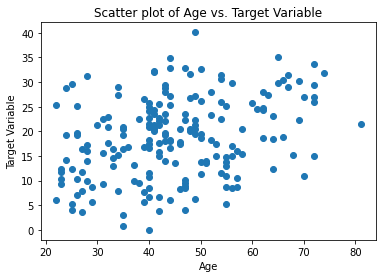

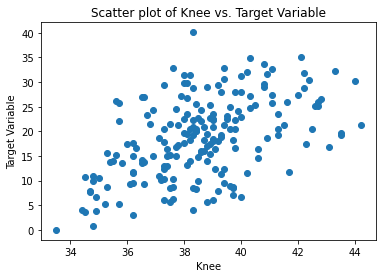

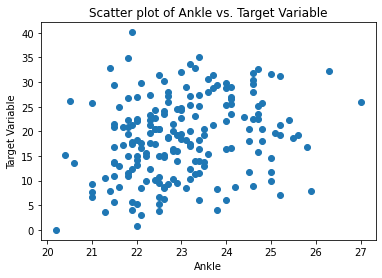

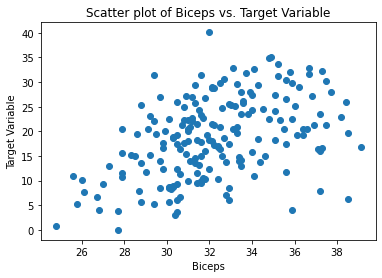

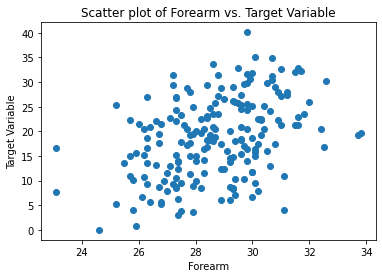

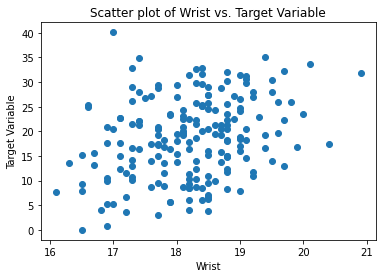

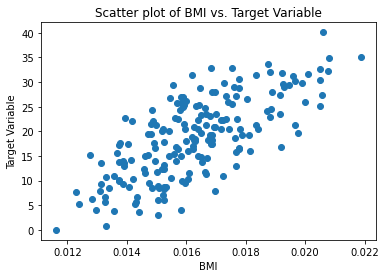

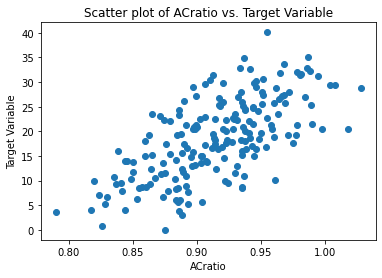

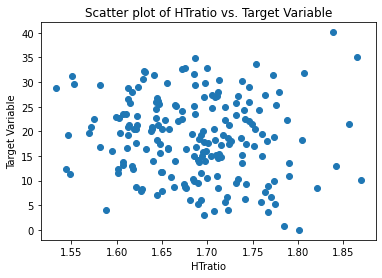

In [51]:
# 1. Linearity
for feature in X_train.columns:
    plt.scatter(X_train[feature], y_train)
    plt.xlabel(feature)
    plt.ylabel('Target Variable')
    plt.title(f'Scatter plot of {feature} vs. Target Variable')
    plt.show()


In [52]:
# 2. No Multicollinearity
X_df = pd.DataFrame(X_train, columns=X_train.columns)
vif = pd.DataFrame()
vif["Feature"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
print(vif)

   Feature         VIF
0      Age   22.230332
1     Knee 1054.395874
2    Ankle  840.293512
3   Biceps  392.353789
4  Forearm  782.337127
5    Wrist 1285.948287
6      BMI  210.828040
7  ACratio  543.758898
8  HTratio  437.795582


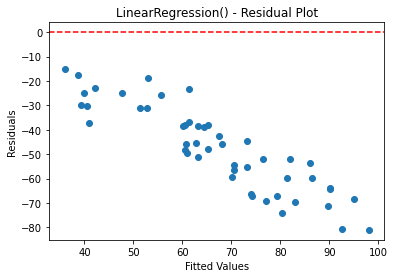

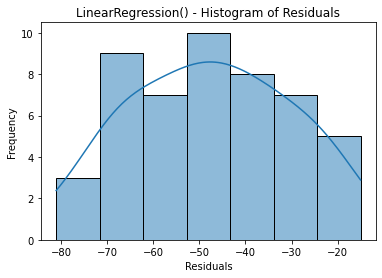

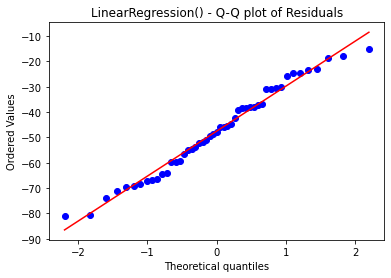

Durbin-Watson test statistic: 0.2594585665658578


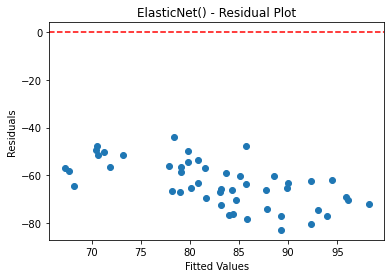

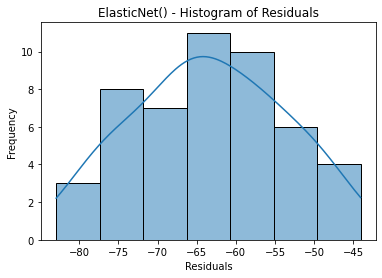

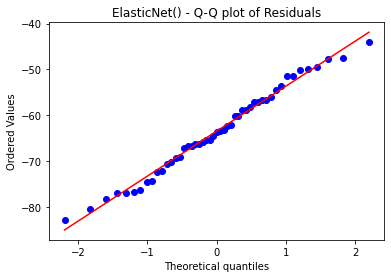

Durbin-Watson test statistic: 0.04803819882891887


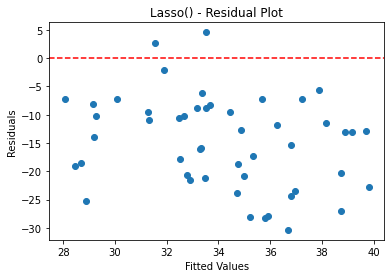

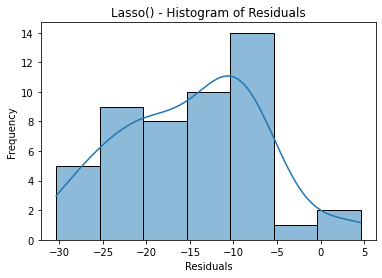

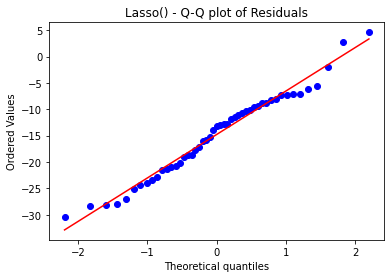

Durbin-Watson test statistic: 0.4665321266204357


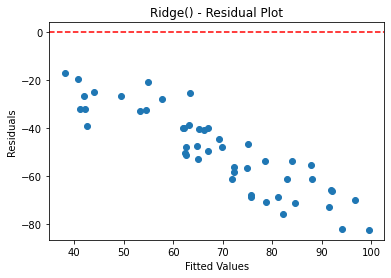

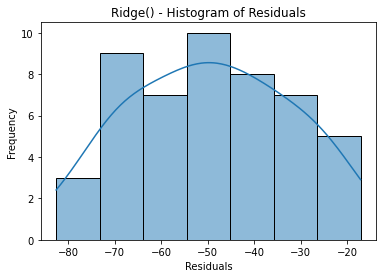

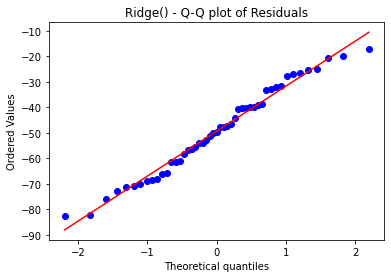

Durbin-Watson test statistic: 0.2402719081319374


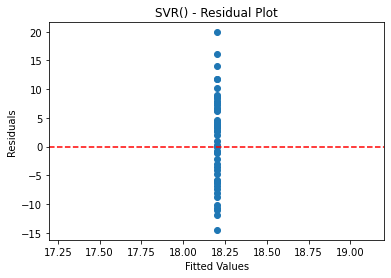

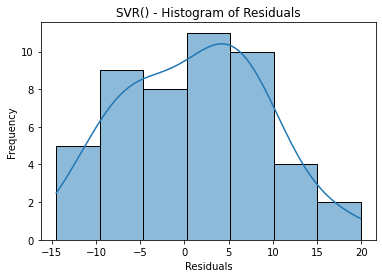

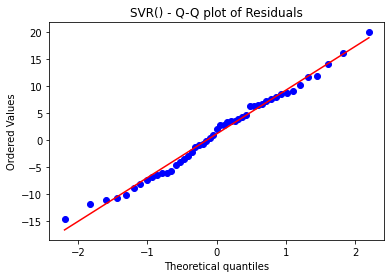

Durbin-Watson test statistic: 1.9769144908111047


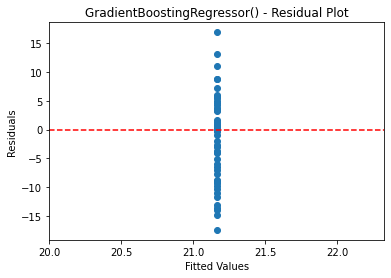

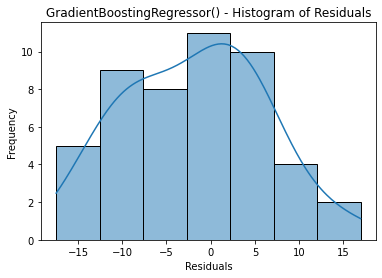

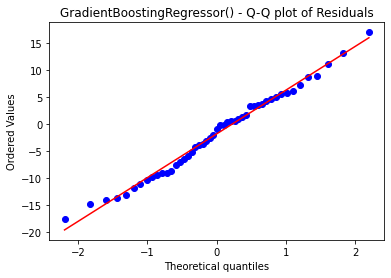

Durbin-Watson test statistic: 1.9157306987245066


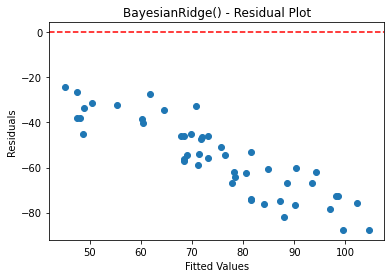

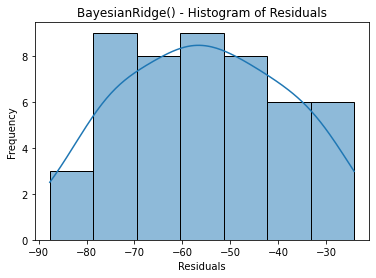

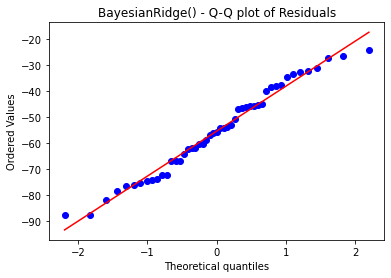

Durbin-Watson test statistic: 0.18790892799984935


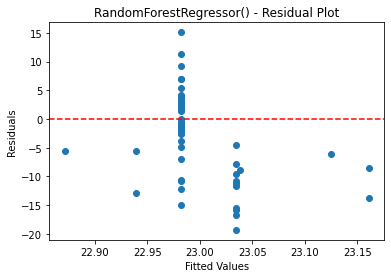

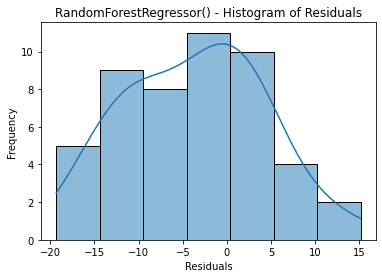

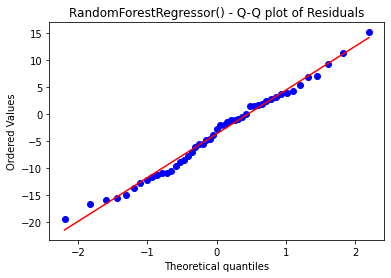

Durbin-Watson test statistic: 1.6599605042799983


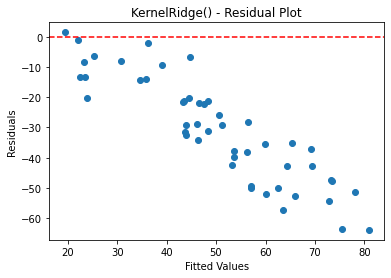

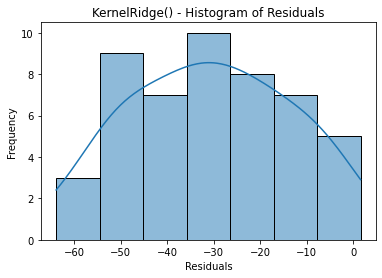

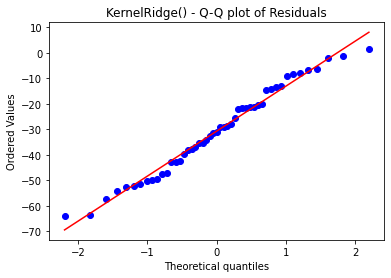

Durbin-Watson test statistic: 0.5307893965795528


In [53]:
models = [linear,elastic,lasso,ridge,svr,grad,bay,random,kernel]
def check_assumptions(model, X_train, y_train, X_test, y_test):
    # 3. Homoscedasticity
    residuals = y_test - model.predict(X_test)
    plt.scatter(model.predict(X_test), residuals)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('{} - Residual Plot'.format(model))
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    # 4. Normality of Residuals
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('{} - Histogram of Residuals'.format(model))
    plt.show()

    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('{} - Q-Q plot of Residuals'.format(model))
    plt.show()

    # 5. Independence of Errors
    durbin_watson_test_statistic = durbin_watson(residuals)
    print(f'Durbin-Watson test statistic: {durbin_watson_test_statistic}')



# Assuming model_list contains all the trained regression models
for model in models:
    check_assumptions(model, X_train, y_train, X_test, y_test)


In [54]:
#final Model:

In [62]:
# Best R2 and RMSE score in the  Linear Regression model
# Create and train your Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# Save the model to a file
dump(model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']